In [20]:
###베이스추정에 의한 정규분포추정

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [21]:
# 파라미터 설정

# 실제 분포
mu_true = 2.0
beta_true = 1.0

# 사전 분포
mu_0 = -2.0
beta_0 = 1.0

# 트레이닝 세트의 데이터 수
N_list = [2, 4, 10, 100]

In [23]:
# 분포 계산 함수
# 파라미터(mu)의 분포 계산
def calc_mu_distribution(t,N):
    mu_bar = np.mean(t)
    mu_N = (N * beta_true * mu_bar + beta_0 * mu_0) / (N * beta_true + beta_0)
    beta_N = N * beta_true + beta_0
    var_N = 1 / beta_N
    return var_N, mu_N,
# 관측값(t)의 분포 계산
def calc_t_distribution(var_N):
    beta_N = 1 / var_N
    var_est = 1.0 / beta_0 + 1.0 / beta_N  # p(t) = N(t | var) = N(t | mu_N, 1/beta + 1/beta_N)
    return var_est

In [25]:
# 분포 시각화 함수
# 파라미터(mu)의 분포 시각화
def draw_mu_distribution(idx, t, mu_N, var_N, axs):
    linex = np.arange(-10, 10.1, 0.01)
    distribution = norm(loc=mu_N, scale=np.sqrt(var_N))  # mu의 사후 분포
    mu_pdf = distribution.pdf(linex)  # pdf: probability density function

    axs[idx].set_title("N=%d" % N)
    axs[idx].plot(linex, mu_pdf, color='red', label="mu_N=%.2f\nvar=%.2f" % (mu_N, var_N))
    axs[idx].scatter(t, [0.2] * N, marker='o', color='blue')
    axs[idx].set_xlim(-5, 5)
    axs[idx].set_ylim(0)
    axs[idx].legend(loc=2)

# 관측값(t)의 분포 시각화
def draw_t_distribution(idx, t, mu_N, var_est, axs):
    linex = np.arange(-10, 10.1, 0.01)
    distribution_post = norm(loc=mu_N, scale=np.sqrt(var_est))  # 관측 데이터의 확률 분포
    t_pdf = distribution_post.pdf(linex)  # pdf: probability density function
    distribution_true = norm(loc=mu_true, scale=np.sqrt(1.0 / beta_true))  # 실제 mu의 확률 분포

    axs[idx].set_title("N=%d" % N)
    axs[idx].plot(linex, distribution_true.pdf(linex), color='green', linestyle='--')  # 실제 확률 분포 표시
    axs[idx].scatter(t, distribution_true.pdf(t), marker='o', color='blue')  # 트레이닝 셋 표시
    axs[idx].plot(linex, t_pdf, color='red', label="mu_N=%.2f\nvar=%.2f" % (mu_N, var_est))  # 관측 데이터의 확률 분포 표시
    axs[idx].set_xlim(-5, 5)
    axs[idx].set_ylim(0)
    axs[idx].legend(loc=2)

<ipython-input-26-2ac0abf6a990>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_mu.show()
<ipython-input-26-2ac0abf6a990>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_t.show()


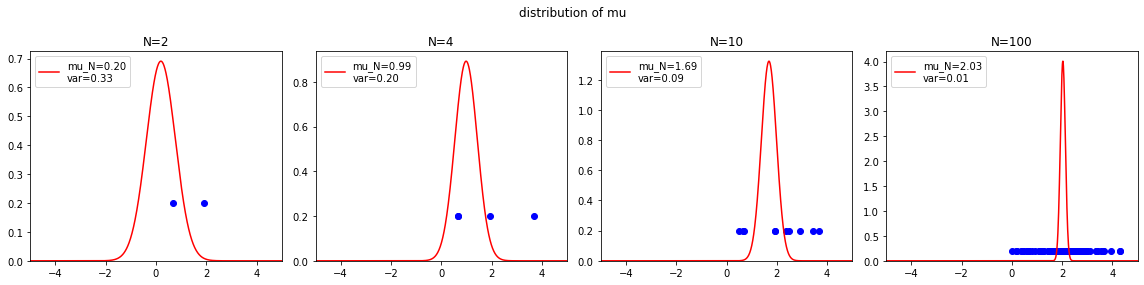

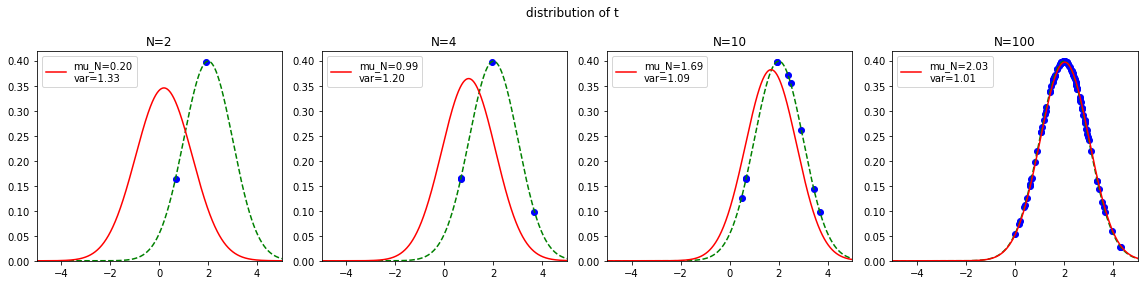

In [26]:
training_set = np.random.normal(loc=mu_true, scale=1.0 / beta_true, size=max(N_list))  # (size=(100,))

fig_mu, axs = plt.subplots(1, len(N_list), figsize=(len(N_list) * 4, 4))  # 베이즈 추정으로 구한 평균(mu)의 확률 분포 시각화
fig_mu.suptitle("distribution of mu")

fig_t, axs_t = plt.subplots(1, len(N_list), figsize=(len(N_list) * 4, 4))  # 베이즈 추정으로 구한 관측 데이터의 확률 분포 시각화
fig_t.suptitle("distribution of t")

# 각각의 N에 대하여 mu, t의 분포 추정
for idx, N in enumerate(N_list):
    # 트레이닝 셋 선택
    t = training_set[0:N]  # N개의 트레이닝 셋 (size=(N,1))

    # 파라미터(mu)의 분포 추정
    var_N, mu_N = calc_mu_distribution(t,N)
    # 파라미터(mu)의 분포 시각화
    draw_mu_distribution(idx, t, mu_N, var_N, axs)

    # 관측값(t)의 분포 추정
    var_est = calc_t_distribution(var_N)
    # 관측값(t)의 분포 시각화
    draw_t_distribution(idx, t, mu_N, var_est, axs_t)

fig_mu.tight_layout()
fig_mu.show()
fig_t.tight_layout()
fig_t.show()
